<img src="medical.jpg">

## Dados de custos médicos / Medical Cost Data 

Dataset: https://www.kaggle.com/mirichoi0218/insurance

In [1]:
from pycaret.datasets import get_data

In [2]:
dados = get_data("insurance")

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
from pycaret.regression import *

In [6]:
regressao = setup(data = dados,
                  target = "charges",
                  normalize= True,
                  combine_rare_levels= True,
                  remove_outliers= True,
                  session_id= 1)
                

,Description,Value
0,session_id,1
1,Target,charges
2,Original Data,"(1338, 7)"
3,Missing Values,False
4,Numeric Features,2
5,Categorical Features,4
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(889, 12)"


# Criando modelo / Creating Model

In [7]:
floresta = create_model("rf")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,3065.8718,34106900.5546,5840.1113,0.7570,0.5776,0.2456
1,2942.7974,24532399.5580,4953.0192,0.8183,0.5449,0.3843
2,1887.0997,10723264.9138,3274.6397,0.8990,0.4367,0.4087
3,3451.8831,29887162.2822,5466.9152,0.7851,0.5286,0.4453
4,3129.8362,29041930.6027,5389.0566,0.7399,0.5266,0.3780
5,2444.9832,18585626.6520,4311.1050,0.8608,0.3952,0.2622
6,2873.0122,24373624.8903,4936.9651,0.8232,0.5056,0.3708
7,3048.1831,32006337.1023,5657.4143,0.7605,0.4838,0.3586
8,2703.9166,24346496.2037,4934.2169,0.8649,0.5006,0.3070
9,2991.1387,22848057.9162,4779.9642,0.8724,0.5506,0.5570


In [9]:
florestaMSE = tune_model(floresta, optimize= "RMSE", n_iter=20)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,3474.9678,30958585.5613,5564.0440,0.7794,0.5621,0.4332
1,2933.9666,21690178.5723,4657.2716,0.8394,0.5159,0.4266
2,1903.1726,7956352.1943,2820.7007,0.9251,0.4507,0.4446
3,2910.4811,22550086.2081,4748.6931,0.8378,0.4875,0.3942
4,2900.8299,24250163.3614,4924.4455,0.7828,0.4774,0.3461
5,2530.0888,18769384.9972,4332.3648,0.8594,0.4110,0.2762
6,2316.3615,15932099.5801,3991.5034,0.8845,0.4033,0.3062
7,3270.5129,32518285.6174,5702.4807,0.7566,0.5102,0.3990
8,2815.7774,25678253.6169,5067.3715,0.8575,0.5083,0.3282
9,2207.4804,13914738.7187,3730.2465,0.9223,0.4539,0.4196


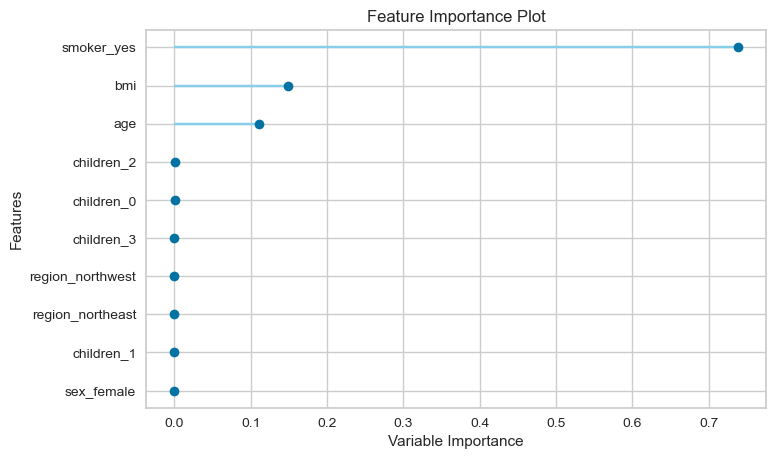

In [11]:
plot_model(florestaMSE, plot = "feature")

# Avaliando os modelos disponíveis e selecionando melhores/Evaluating available models and selecting best

In [12]:
modelos = compare_models(sort="RMSE", n_select=4)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2618.5105,21939145.7054,4620.8009,0.8411,0.4538,0.3272,0.0660
rf,Random Forest Regressor,2853.8722,25045180.0676,4954.3408,0.8181,0.5050,0.3717,0.2340
lightgbm,Light Gradient Boosting Machine,2994.3713,25369952.6835,4955.4442,0.8154,0.5668,0.3913,0.2940
et,Extra Trees Regressor,2807.6434,28147467.2349,5262.9452,0.7960,0.5151,0.3584,0.2070
ada,AdaBoost Regressor,4398.6469,29398149.9942,5410.5915,0.7846,0.6748,0.8214,0.0350
lr,Linear Regression,4073.6691,36173734.0000,5978.1045,0.7388,0.5687,0.4140,0.1730
ridge,Ridge Regression,4090.1058,36183783.6000,5978.8547,0.7388,0.5570,0.4173,0.0430
lar,Least Angle Regression,4074.4784,36183046.7742,5978.8547,0.7387,0.5635,0.4142,0.0260
br,Bayesian Ridge,4084.1088,36183583.7870,5978.8591,0.7388,0.5565,0.4161,0.0530
lasso,Lasso Regression,4074.6997,36183385.0000,5978.9154,0.7387,0.5596,0.4143,0.0350


In [13]:
modelos_tune = [tune_model(i, optimize="RMSE") for i in modelos]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,3508.3264,32838992.8188,5730.5316,0.7660,0.5688,0.4666
1,3406.8590,26066491.6672,5105.5354,0.8070,0.5323,0.4748
2,2450.2553,12797815.9246,3577.4035,0.8795,0.4933,0.5136
3,3305.1853,27626225.2784,5256.0656,0.8013,0.5208,0.4510
4,3343.9516,28308065.8944,5320.5325,0.7465,0.4921,0.3895
5,3144.9341,26202427.6125,5118.8307,0.8037,0.4289,0.3237
6,2949.6566,21909426.9633,4680.7507,0.8411,0.4336,0.3735
7,3722.2985,32302379.4618,5683.5182,0.7583,0.5260,0.4768
8,3297.6002,29383598.5735,5420.6640,0.8369,0.4974,0.3815
9,3019.5227,25468500.1154,5046.6326,0.8577,0.5000,0.5001


In [15]:
#combinando melhores modelos
modelo_combine = blend_models(modelos_tune)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,3371.7510,32884313.9854,5734.4846,0.7657,0.5438,0.3974
1,2951.5135,21211751.2863,4605.6217,0.8429,0.5048,0.4090
2,2036.4176,8786750.9399,2964.2454,0.9173,0.4496,0.4484
3,2981.0226,23804348.6579,4878.9700,0.8288,0.5109,0.4279
4,2947.8550,24011180.8671,4900.1205,0.7849,0.4707,0.3550
5,2479.1895,18832893.5149,4339.6882,0.8589,0.3959,0.2774
6,2509.2542,16773573.7255,4095.5554,0.8784,0.4132,0.3273
7,3169.5873,28664619.7889,5353.9350,0.7855,0.4877,0.4094
8,2812.9731,24189956.6234,4918.3286,0.8657,0.4921,0.3575
9,2636.6741,17661288.2102,4202.5335,0.9013,0.4722,0.4627


In [16]:
#verificando a performance nos dados de validacao 
pred = predict_model(modelo_combine)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,2733.0215,21385826.7399,4624.4812,0.8491,0.4424,0.3654


In [17]:
#aplicando modelo final
modelo_final = finalize_model(modelo_combine)

In [18]:
#salvando modelo
save_model(modelo_final, "meu-modelo-para-os-custos")

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='charges',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy...
                                                                   ccp_alpha=0.0,
                                                                   criterion='mse',
                                                                   max_depth=3,
                                                                   

In [22]:
#função para receber novos valores e predizer custos
def CustoSeguro(age, sex, bmi, children, smoker, region):
    dados0 = {'age': [age], 'sex':[sex], 'bmi':[bmi], 'children':[children], 'smoker':[smoker], 'region':[region]}
    dados = pd.DataFrame(dados0)
    
    modelo = load_model('meu-modelo-para-os-custos')
    
    pred = float(predict_model(modelo, data = dados)['Label'].round(2))
    valor = round(1.8*pred, 2)
    
    print('  ')
    print('Idade: {}'.format(age))
    print('Sexo: {}'.format(sex))
    print('IMC: {}'.format(bmi))
    print('Crianças: {}'.format(children))
    print('Fumante: {}'.format(smoker))
    print('Região: {}'.format(region))
    print(' ')
    print('Custo do Seguro: R${}'.format(pred))
    print('Valor de Venda: R${}'.format(valor))
    
    

In [23]:
CustoSeguro(age = 24, sex = 'male', bmi = 26, children = 0, smoker = 'no', region = 'southwest')

Transformation Pipeline and Model Successfully Loaded
  
Idade: 24
Sexo: male
IMC: 26
Crianças: 0
Fumante: no
Região: southwest
 
Custo do Seguro: R$4269.11
Valor de Venda: R$7684.4
